# Gender Coverage

## Setup

In [1]:
library(tidyverse)
library(dbplyr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘dbplyr’

The following objects are masked from ‘package:dplyr’:

    ident, sql



In [2]:
db = src_postgres(dbname = 'openlib')

In [3]:
options(repr.matrix.max.rows=15, repr.plot.height=4.5)

## Basic Resolution Stats

Let's code our authors by different resolution statuses.

In [4]:
reso_stats = db %>% tbl('author_resolution_summary') %>%
    group_by(status) %>%
    summarize(Count=n()) %>%
    collect() %>% ungroup() %>%
    mutate(Frac=Count / sum(as.numeric(Count)))
reso_stats

status,Count,Frac
ambiguous,1850,0.003581745
known,247717,0.479599542
no-author,112629,0.218058578
no-gender,154312,0.298760135


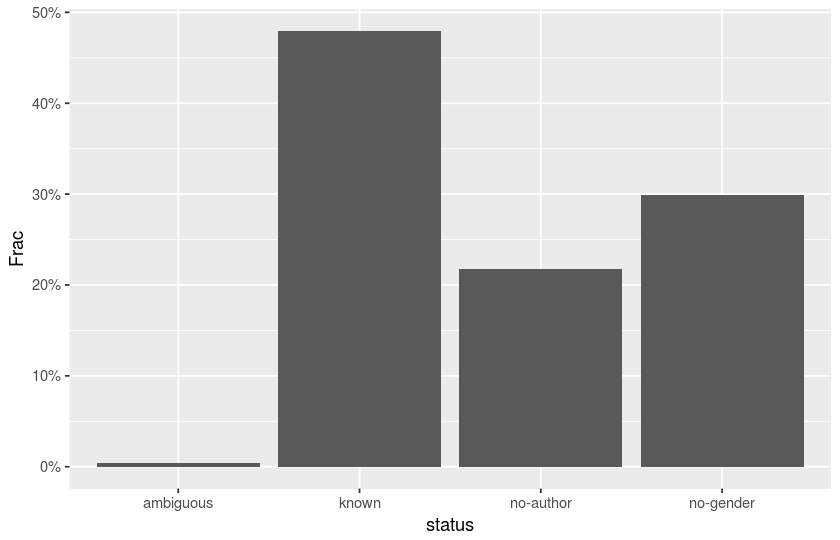

In [5]:
ggplot(reso_stats) +
    aes(x=status, y=Frac) +
    geom_bar(stat='identity') +
    scale_y_continuous(labels=scales::percent)

## Statistics for BookCrossing

In [7]:
bx_rate_stats = tbl(db, 'bx_ratings') %>%
    inner_join(tbl(db, 'isbn_book_id')) %>%
    inner_join(tbl(db, 'bx_book_info')) %>%
    left_join(tbl(db, 'author_resolution_summary')) %>%
    group_by(status) %>%
    summarize(Count=n()) %>%
    collect() %>% ungroup() %>%
    mutate(Frac=Count / sum(as.numeric(Count)))

Joining, by = "isbn"
Joining, by = c("isbn", "book_id")
Joining, by = c("author_id", "author_name")


In [8]:
bx_rate_stats

status,Count,Frac
ambiguous,6631,0.00576719
known,852247,0.74122615
no-author,40322,0.03506932
no-gender,92422,0.08038233
NA,158158,0.13755501


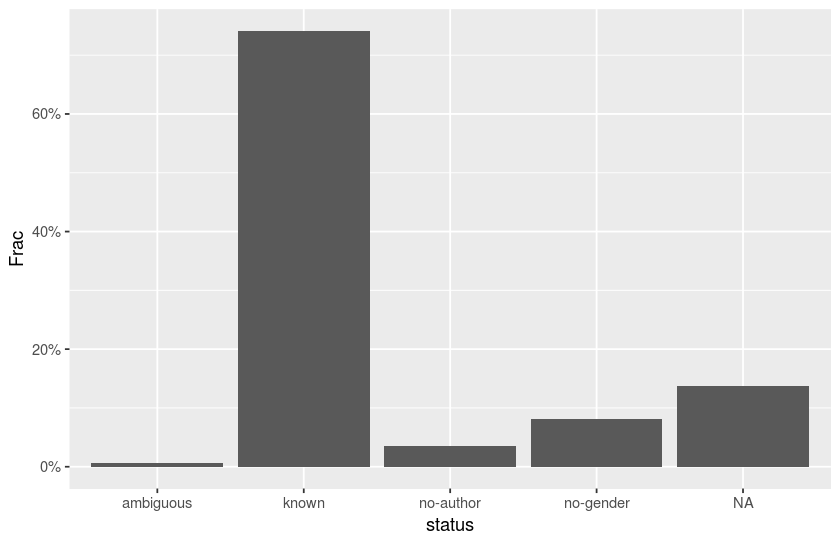

In [9]:
ggplot(bx_rate_stats) +
    aes(x=status, y=Frac) +
    geom_bar(stat='identity') +
    scale_y_continuous(labels=scales::percent)

73.5% of ratings are of a book with unambiguously resolved gender.

## Statistics for Amazon

In [ ]:
az_rate_stats = tbl(db, 'az_ratings') %>%
    select(isbn=asin) %>%
    inner_join(tbl(db, 'isbn_book_id')) %>%
    inner_join(tbl(db, 'az_book_info')) %>%
    left_join(tbl(db, 'author_resolution_summary')) %>%
    group_by(status) %>%
    summarize(Count=n()) %>%
    collect() %>% ungroup() %>%
    mutate(Frac=Count / sum(as.numeric(Count)))

Joining, by = "isbn"
Joining, by = "book_id"
Joining, by = c("author_id", "author_name")


In [ ]:
az_rate_stats

In [ ]:
ggplot(az_rate_stats) +
    aes(x=status, y=Frac) +
    geom_bar(stat='identity') +
    scale_y_continuous(labels=scales::percent)